# **🧠 Step 1: Load and Inspect the Data**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np


# To make plots looks cleaner
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Check the shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (429435, 67)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vac

In [3]:
# Convert 'date' to datetime format and handle errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' couldn't be converted (i.e., became NaT)
df = df.dropna(subset=['date'])

# Optional: reset index if needed
df = df.reset_index(drop=True)


df['date'].min(), df['date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2024-08-14 00:00:00'))

# **🧠 Step 2: Basic Data Exploration**

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
weekly_icu_admissions,418442
weekly_icu_admissions_per_million,418442
excess_mortality,416024
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality_cumulative_per_million,416024
weekly_hosp_admissions,404938
weekly_hosp_admissions_per_million,404938
icu_patients_per_million,390319
icu_patients,390319


**Check Locations**

In [6]:
df['location'].nunique(), df['location'].unique()[:10]

(255,
 array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
        'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
        'Argentina'], dtype=object))

# **📊 Step 3: Choose a Country and Filter the Data**

In [7]:
country = "Italy"
df_country = df[df["location"]== country].copy()
df_country.shape

(1677, 67)

In [8]:
df_country.columns.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

# **📊 Step 4: Visualization**

**📊 Step 1: Total Cases Over Time**

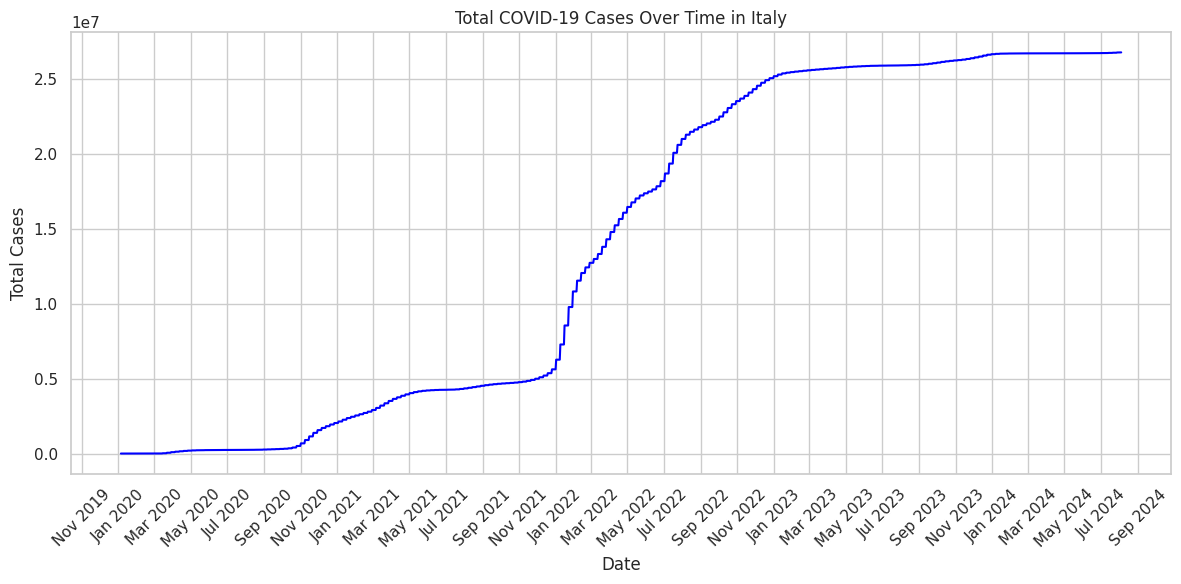

In [9]:
plt.figure(figsize=(12, 6))

# sns.lineplot(x="date", y="total_cases", data=df_country.tail(100))

sns.lineplot(x="date", y="total_cases", data=df_country, color="blue")
plt.title("Total COVID-19 Cases Over Time in Italy")
plt.xlabel("Date")
plt.ylabel("Total Cases")

# Set major x-axis ticks to monthly interval

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 Step 2: New Daily Cases

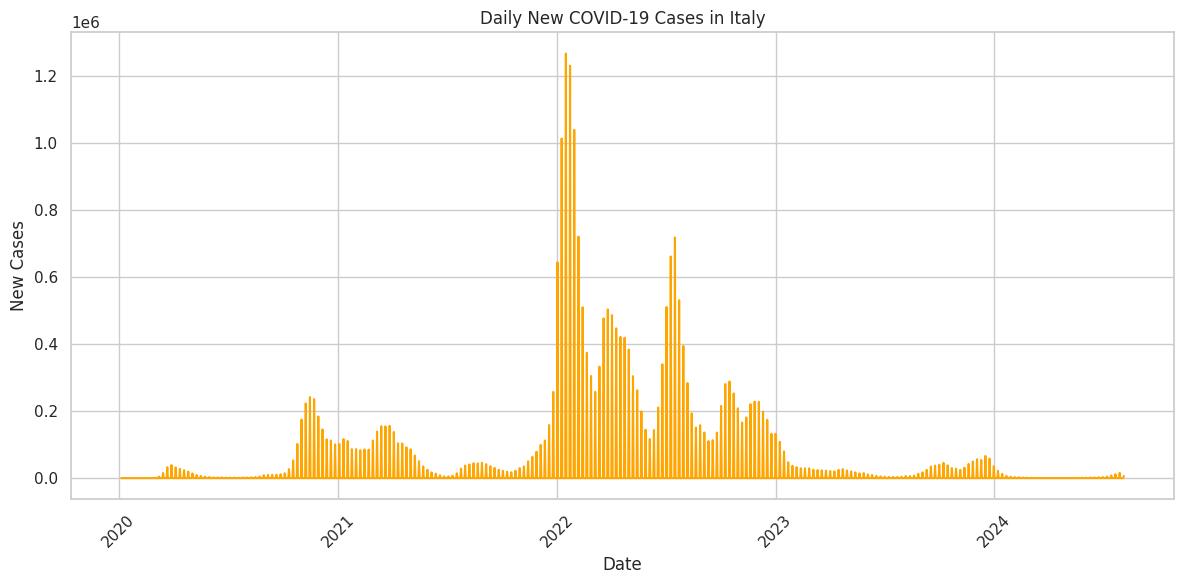

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="new_cases", data=df_country, color="orange")
plt.title("Daily New COVID-19 Cases in Italy")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📉 Step 3: Total Deaths Over Time

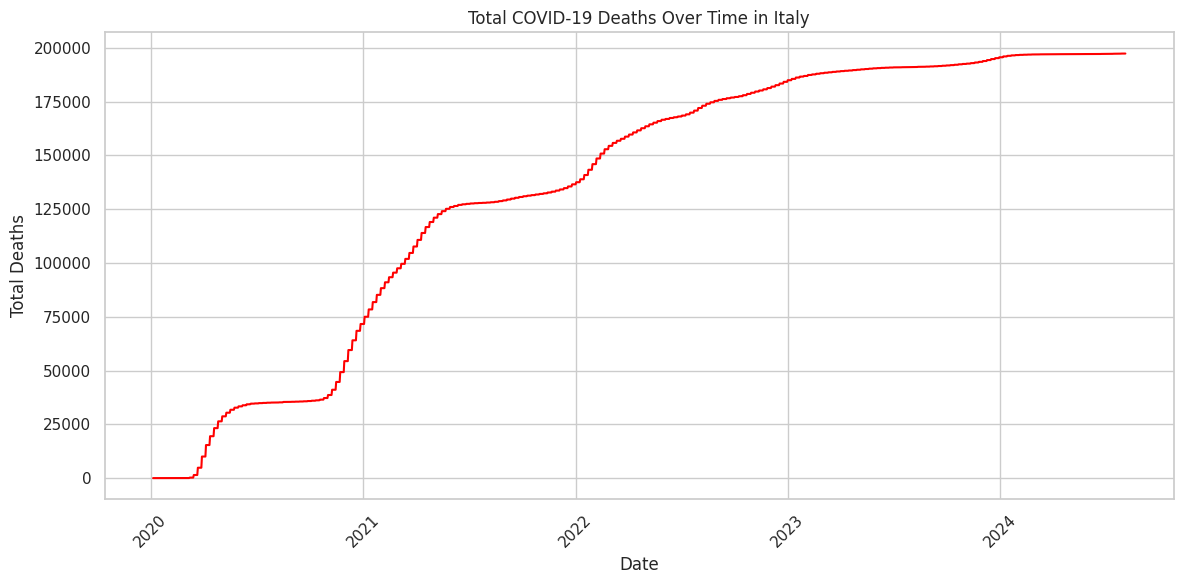

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="total_deaths", data=df_country, color="red")
plt.title("Total COVID-19 Deaths Over Time in Italy")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 Step 4: Create Line Charts to Show Trends Over Time

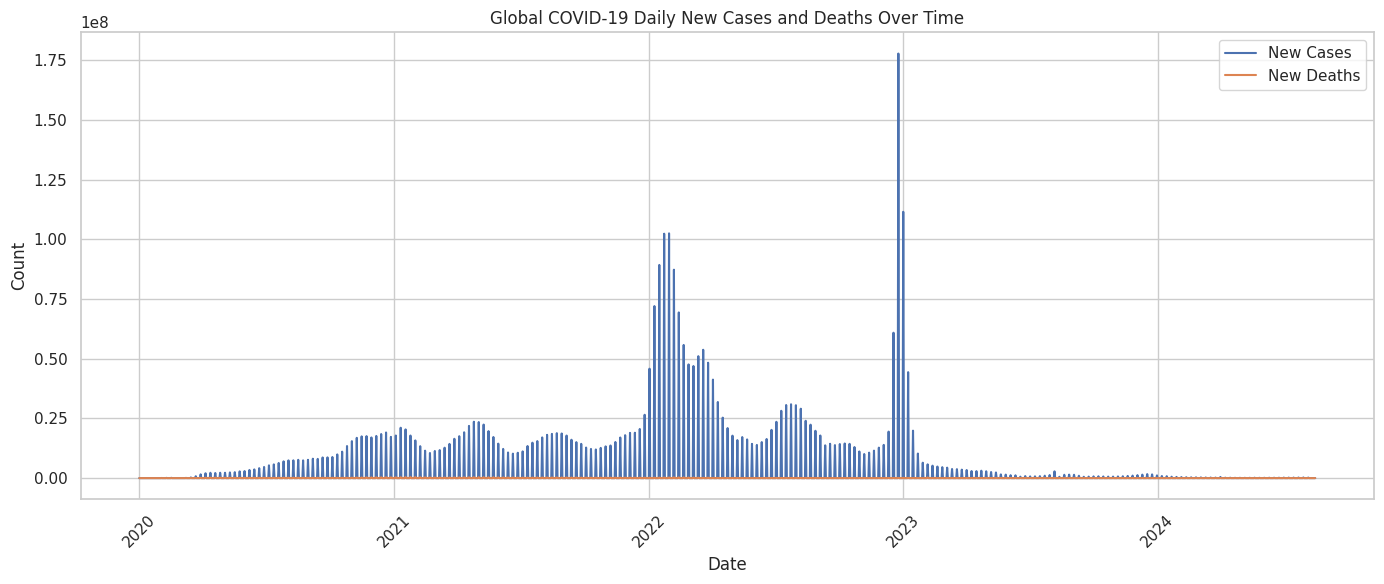

In [12]:
# Grouping by date to get daily global trends
global_trends = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

# Line plot for new cases and new deaths
plt.figure(figsize=(14, 6))
sns.lineplot(data=global_trends, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=global_trends, x='date', y='new_deaths', label='New Deaths')
plt.title('Global COVID-19 Daily New Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**To make it clear we plot it differently**

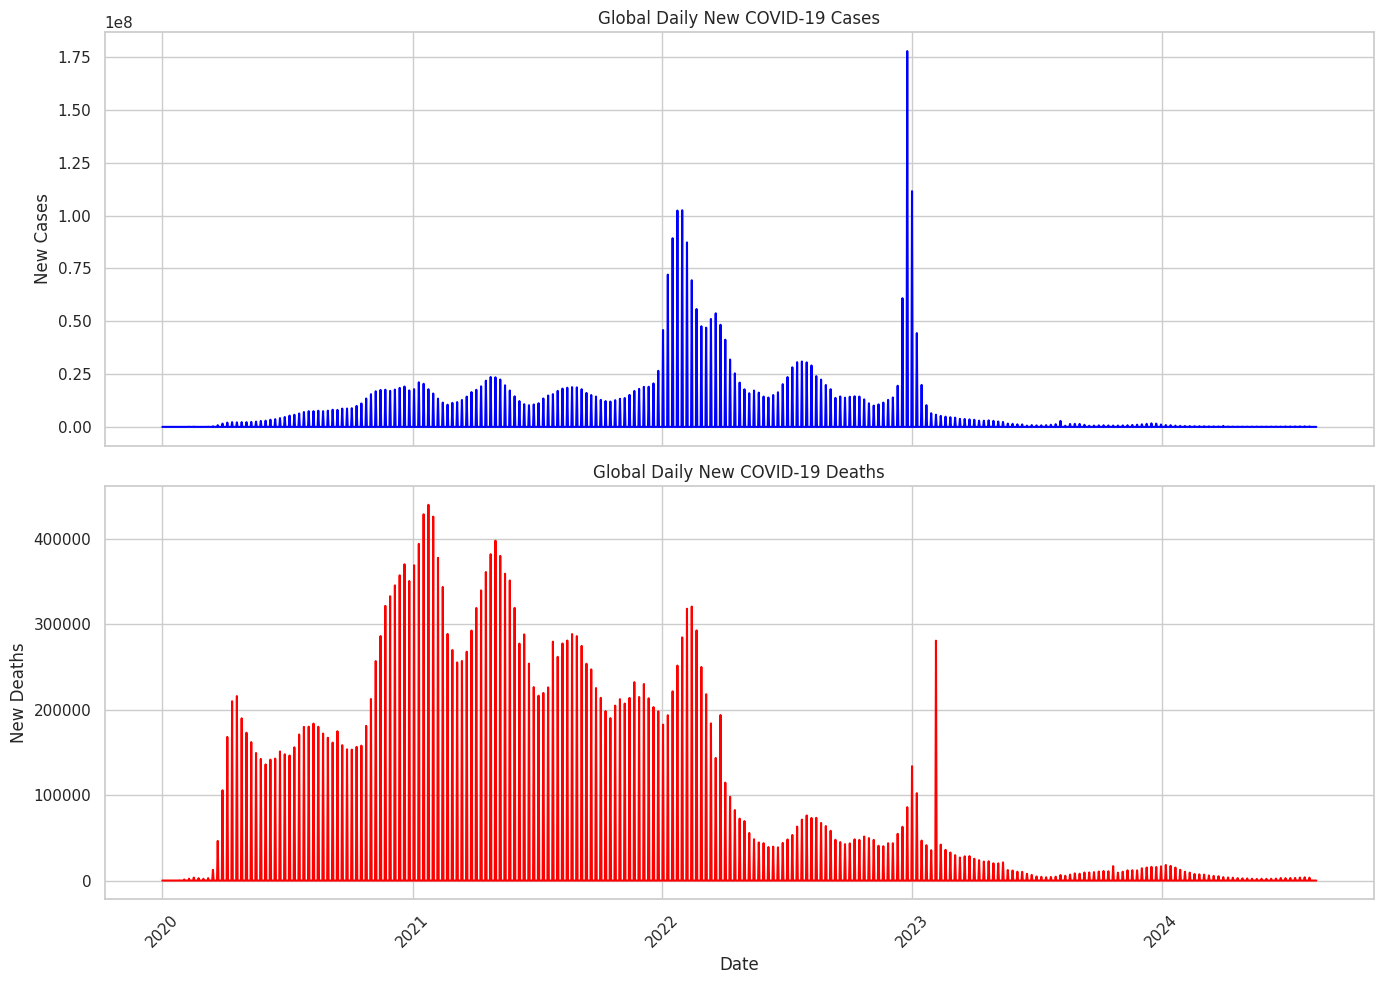

In [13]:
# Line charts in separate plots
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# New Cases
sns.lineplot(data=global_trends, x='date', y='new_cases', ax=axs[0], color='blue')
axs[0].set_title('Global Daily New COVID-19 Cases')
axs[0].set_ylabel('New Cases')

# New Deaths
sns.lineplot(data=global_trends, x='date', y='new_deaths', ax=axs[1], color='red')
axs[1].set_title('Global Daily New COVID-19 Deaths')
axs[1].set_ylabel('New Deaths')
axs[1].set_xlabel('Date')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Step 5: Implement 7-Day Rolling Averages

In [14]:
# Calculate 7-day rolling averages for new cases and new deaths
global_trends['new_cases_7day_avg'] = global_trends['new_cases'].rolling(window=7).mean()
global_trends['new_deaths_7day_avg'] = global_trends['new_deaths'].rolling(window=7).mean()

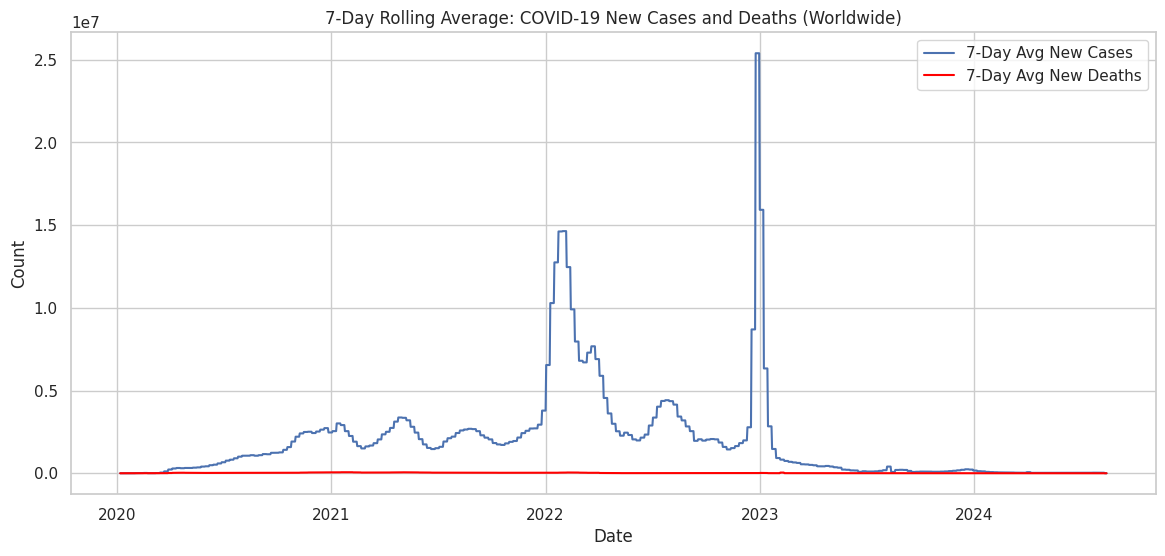

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(global_trends['date'], global_trends['new_cases_7day_avg'], label='7-Day Avg New Cases')
plt.plot(global_trends['date'], global_trends['new_deaths_7day_avg'], label='7-Day Avg New Deaths', color='red')
plt.title('7-Day Rolling Average: COVID-19 New Cases and Deaths (Worldwide)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

✅ Summary:

rolling(window=7).mean() computes the mean of the past 7 days (including the current day).

This helps reveal the overall direction (trend) by removing daily fluctuations or reporting delays.

✅ Step 6: Vaccination progress over time

Goal: show how people_vaccinated / people_fully_vaccinated changed per country (absolute or per 100 people).

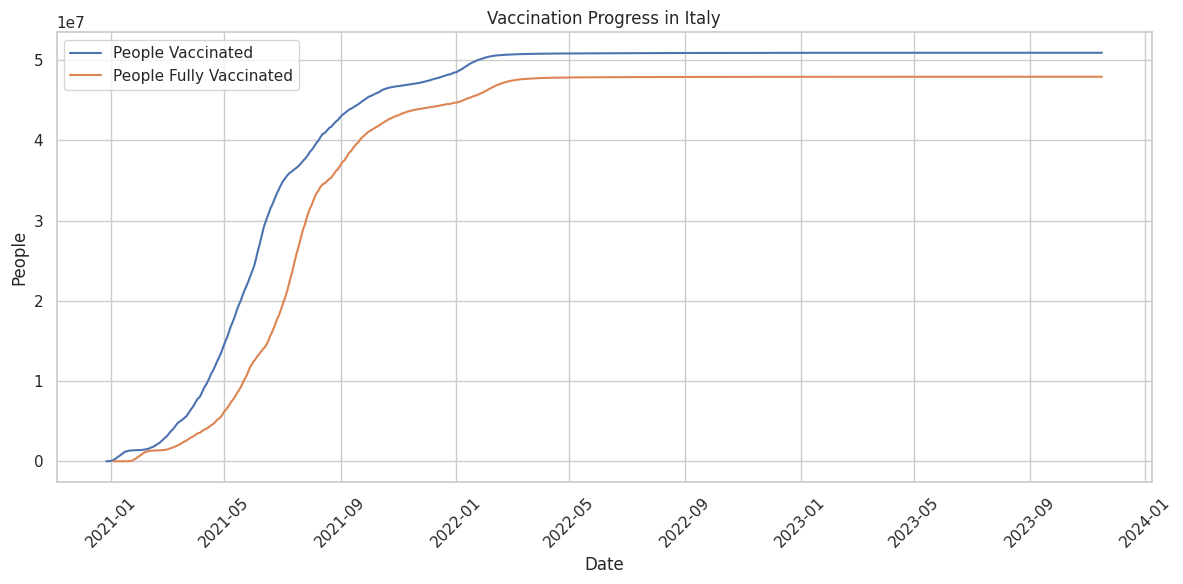

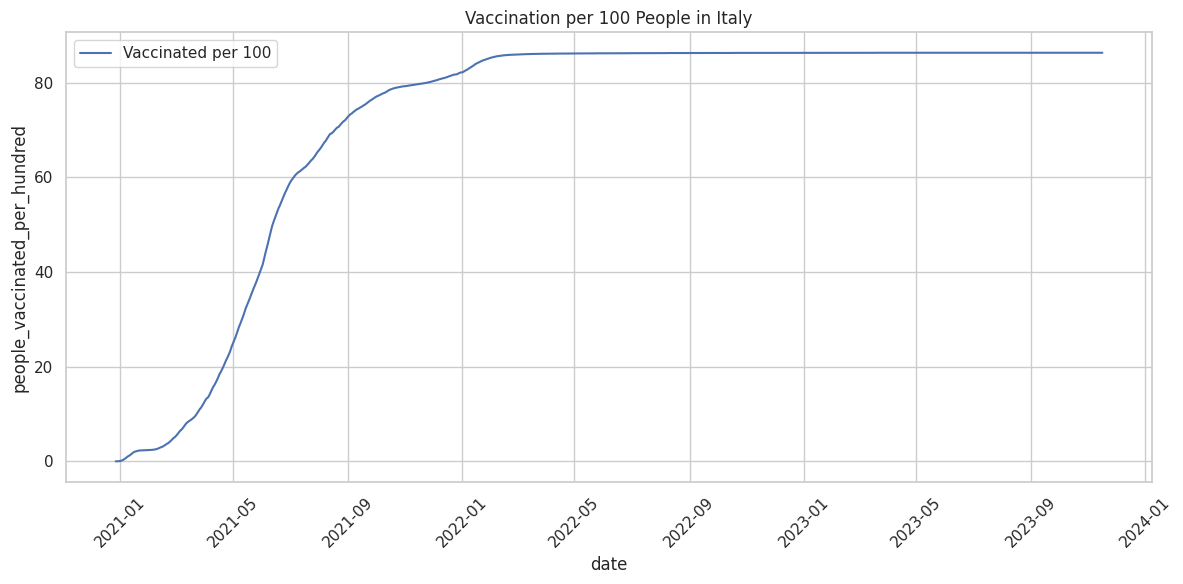

In [16]:
# Choose country (or loop multiple)
country = "Italy"
c_df = df[df['location'] == country].copy()

# ensure date is datetime
c_df['date'] = pd.to_datetime(c_df['date'])

# Plot absolute vaccinated counts
plt.figure(figsize=(12,6))
sns.lineplot(data=c_df, x='date', y='people_vaccinated', label='People Vaccinated')
sns.lineplot(data=c_df, x='date', y='people_fully_vaccinated', label='People Fully Vaccinated')
plt.title(f'Vaccination Progress in {country}')
plt.xlabel('Date'); plt.ylabel('People')
plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# Optional: per 100 people (normalized)
if 'people_vaccinated_per_hundred' in c_df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=c_df, x='date', y='people_vaccinated_per_hundred', label='Vaccinated per 100')
    plt.title(f'Vaccination per 100 People in {country}')
    plt.xticks(rotation=45); plt.tight_layout(); plt.show()


What to look for: rollout start date, speed, plateauing, gaps between first dose and fully vaccinated.

✅ Step 7 — Case Fatality Rate (CFR)

Goal: compute CFR = total_deaths / total_cases (or rolling) to inspect severity over time.

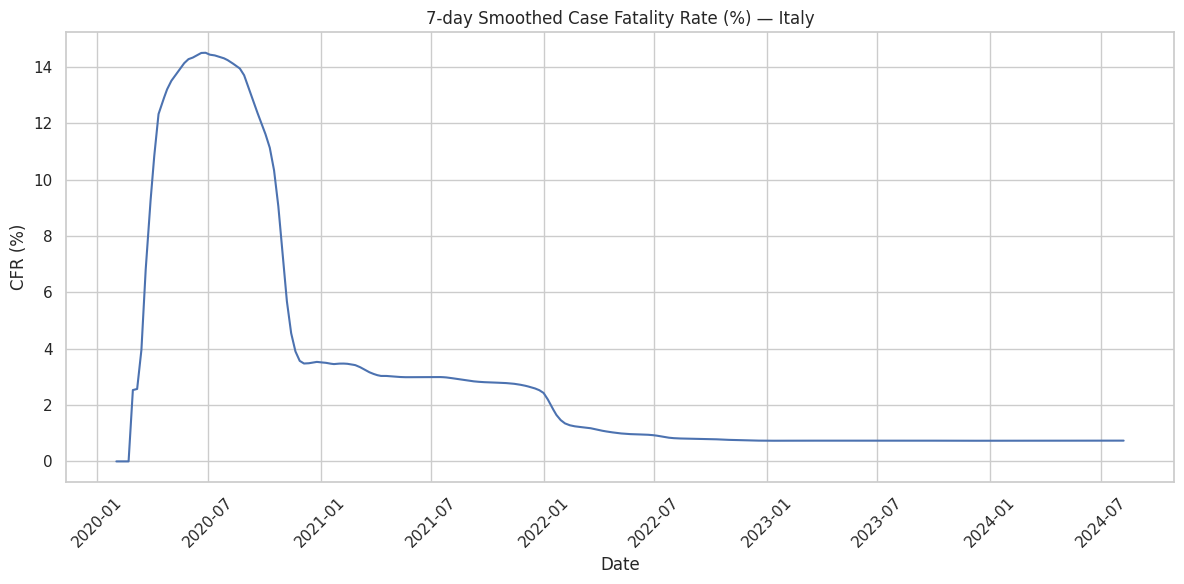

In [19]:
# compute CFR safely
c_df = df[df['location'] == country].copy()
c_df['total_cases'] = c_df['total_cases'].fillna(0)
c_df['total_deaths'] = c_df['total_deaths'].fillna(0)

# avoid divide-by-zero
c_df['CFR'] = (c_df['total_deaths'] / c_df['total_cases']).replace([np.inf, -np.inf], np.nan) * 100

# optional 7-day smoothing on CFR to reduce noise
c_df['CFR_7day'] = c_df['CFR'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=c_df, x='date', y='CFR_7day')
plt.title(f'7-day Smoothed Case Fatality Rate (%) — {country}')
plt.xlabel('Date'); plt.ylabel('CFR (%)')
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


What to look for: peaks that may indicate waves under stress, long-term decline as treatments/immunity improve.

✅ Step 8 — Heatmap / Global snapshot

Goal: create a heatmap or choropleth-style view (simpler: heatmap table of countries vs date buckets).

Option A — heatmap of totals for top N countries (by peak cases)

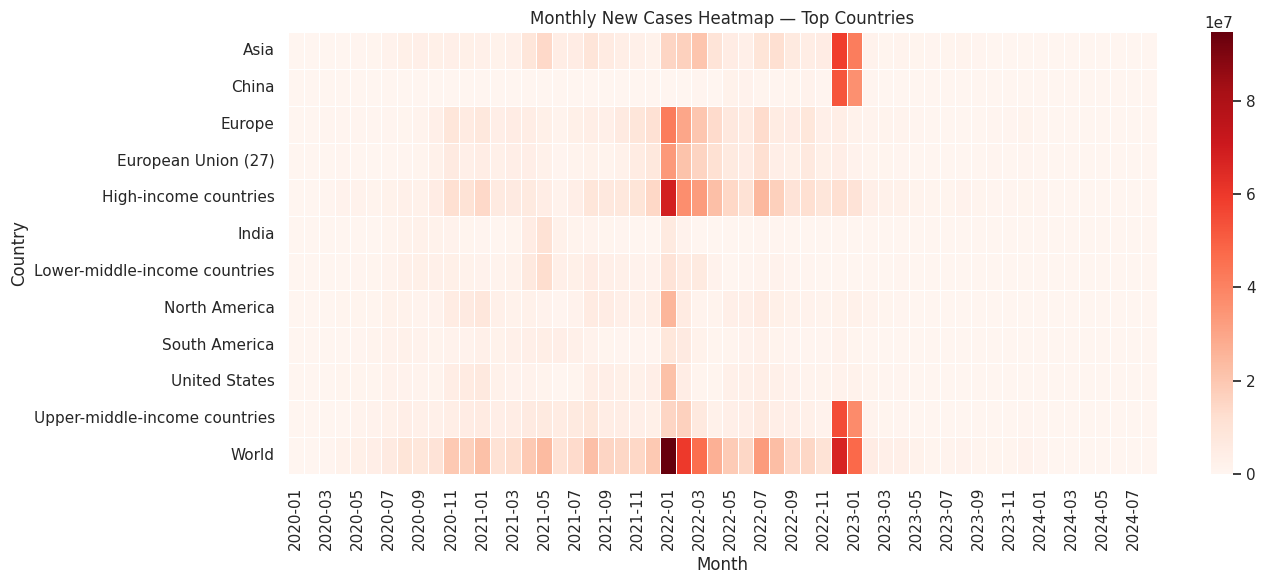

In [20]:
# pick top N countries by max total_cases
topN = 12
agg = df.groupby('location')['total_cases'].max().dropna().sort_values(ascending=False).head(topN).index.tolist()

# build a pivot table (use monthly buckets to keep it small)
df['month'] = pd.to_datetime(df['date']).dt.to_period('M').astype(str)
pivot = df[df['location'].isin(agg)].pivot_table(values='new_cases', index='location', columns='month', aggfunc='sum').fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='Reds', linewidths=.5)
plt.title('Monthly New Cases Heatmap — Top Countries')
plt.xlabel('Month'); plt.ylabel('Country'); plt.tight_layout(); plt.show()
